In [29]:
import numpy as np
from PIL import Image
import os
import sys
import cv2
from Otsu import Otsu
from CurveDetect import CurveDetect
from tools import delete_noise, show_prediction

In [30]:
TRAIN_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default/"
TRAIN_FILE_ROOT4 =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_train_default4/"
TEST_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/stage1_test/"
ANSWER_FILE_ROOT =  "/data/unagi0/kanayama/dataset/nuclei_images/answer/"
VALIDATION_FILE_ROOT = "/data/unagi0/kanayama/dataset/nuclei_images/answer_val/"

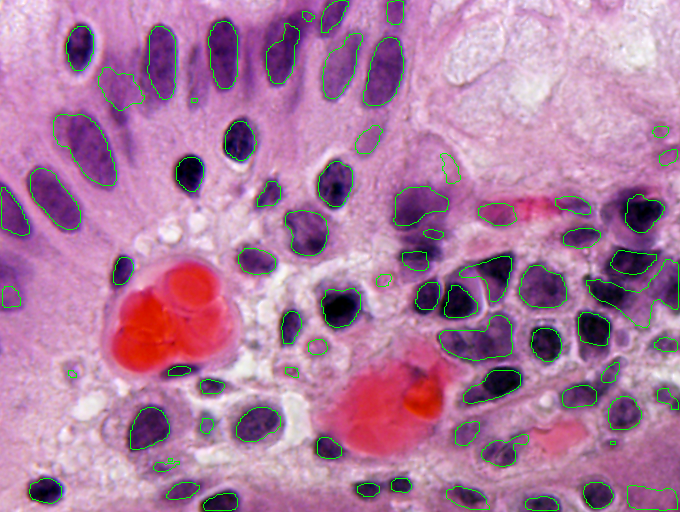

In [4]:
# test画像に対する処理

filename = 'a4816cc1fb76cb3c5e481186833fc0ae9cf426a1406a2607e974e65e9cddba4f'
filename = 'a984e7fb886aa02e29d112766d3ce26a4f78eac540ce7bbdbd42af2761928f6d'
filename = '44afae184c89e6ba55985b4d341acc1ae1e8b6ef96312064e0e6e630e022b078'
filename = '472b1c5ff988dadc209faea92499bc07f305208dbda29d16262b3d543ac91c71'

# HE
#filename = "259b35151d4a7a5ffdd7ab7f171b142db8cfe40beeee67277fac6adca4d042c4"
#filename = "17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff" 

original_image =  Image.open(TEST_FILE_ROOT + filename + '/images/' + filename + ".png")
predicted_mask =  Image.open(ANSWER_FILE_ROOT + filename + ".png")
original_image_array = np.asarray(original_image)
predicted_mask_array = np.asarray(predicted_mask)

# 予測値に対して何らかの後処理を施す
predicted_mask_array = delete_noise(predicted_mask_array, iterations=0)  

dst = show_prediction(original_image_array, predicted_mask_array)
dst

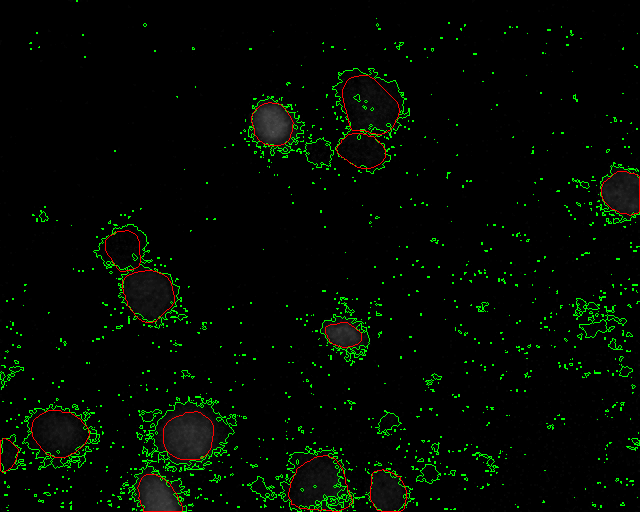

In [61]:
# validation画像に対する処理

#白黒
#filename = "f6863b83d75e5927b30e2e326405b588293283c25aaef2251b30c343296b9cb1"
#filename = "fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de"
filename = "2ab91a4408860ae8339689ed9f87aa9359de1bdd4ca5c2eab7fff7724dbd6707"
#filename = "0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426"
#filename = "4c032609d377bd980e01f888e0b298600bf8af0e33c4271a1f3aaf76964dce06"
#filename = "f7eaaf420b5204c4a42577428b7cd897a53ef07b759ccbba3ed30a3548ca5605"
#filename = "a891bbc89143bca7a717386144eb061ec2d599cba24681389bcb3a2fedb8ff8c"

#紫
#filename = "0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6"
#filename = "4cbd6c37f3a55a538d759d440344c287cac66260d3047a83f429e63e7a0f7f20"
#filename = "aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0"
#filename = "1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72"
#filename = "c0f172831b8017c769ff0e80f85b096ac939e79de3d524e0826fbb95221365da"

filename = "4cbd6c37f3a55a538d759d440344c287cac66260d3047a83f429e63e7a0f7f20"
#filename = "c0f172831b8017c769ff0e80f85b096ac939e79de3d524e0826fbb95221365da"
#filename = "0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6"
#filename = "1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72"
filename = "aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0"

filename = "3441821ebea04face181c9e2f4d0d09727c764827ac51b9e7fbadbebabeab225"
filename = "0b2e702f90aee4fff2bc6e4326308d50cf04701082e718d4f831c8959fbcda93" #なんだこれ・・・
#filename = "8a26b134fe9343c0c794513dae7787b7ac1debec3bb2a7096ab0b874a31d8175"
#filename = "77ceeb87f560775ac150b8b9b09684ed3e806d0af6f26cce8f10c5fc280f5df2"
#filename = "6b6d4e6ff52de473a4b6f8bd0f11ae22242d508cc4117ff38ec39cbb88088aaa"
filename = "431b9b0c520a28375b5a0c18d0a5039dd62cbca7c4a0bcc25af3b763d4a81bec" # なんだこれ・・・
#filename = "2f929b067a59f88530b6bfa6f6889bc3a38adf88d594895973d1c8b2549fd93d"
filename = "29ea4f6eb4545f43868a9b40a60000426bf8dfd9d062546656a37bd2a2aaf9ec" # なんだこれ・・・
#filename = "cf26c41245febfe67c2a1682cc4ee8752ee40ae3e49610314f45923b8bf5b08a"
#filename = "0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1"

#filename = "aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0"
#filename = "1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72"
#filename = "c0f172831b8017c769ff0e80f85b096ac939e79de3d524e0826fbb95221365da"

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename + ".png")
predicted_mask = Image.open(VALIDATION_FILE_ROOT + filename + ".png")
gt_mask = Image.open(TRAIN_FILE_ROOT + '/masks/' + filename + ".png")
original_image_array = np.asarray(original_image)[:, :, :3].copy()  # なぜかcopyを入れないと動かない・・・
predicted_mask_array = np.asarray(predicted_mask)
gt_mask_array = np.asarray(gt_mask)

dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)
dst

In [14]:
# validation画像に対する処理
# U-Netの代わりに大津の2値化を適用した場合

#白黒
#filename = "f6863b83d75e5927b30e2e326405b588293283c25aaef2251b30c343296b9cb1"
#filename = "fc22db33a2495f58f118bc182c0087e140df14ccb8dad51373e1a54381f683de"
filename = "2ab91a4408860ae8339689ed9f87aa9359de1bdd4ca5c2eab7fff7724dbd6707"
#filename = "0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426"

#紫
#filename = "0bf33d3db4282d918ec3da7112d0bf0427d4eafe74b3ee0bb419770eefe8d7d6"
filename = "4cbd6c37f3a55a538d759d440344c287cac66260d3047a83f429e63e7a0f7f20"
#filename = "aa58ba4512955771b4f9b459cb4e6a8adb71d11cd6cae662ec2df31d688a5fe0"
#filename = "1ec74a26e772966df764e063f1391109a60d803cff9d15680093641ed691bf72"
#filename = "c0f172831b8017c769ff0e80f85b096ac939e79de3d524e0826fbb95221365da"

original_image =  Image.open(TRAIN_FILE_ROOT + '/images/' + filename + ".png")
gt_mask = Image.open(TRAIN_FILE_ROOT + '/masks/' + filename + ".png")
original_image_array = np.asarray(original_image)[:, :, :3].copy() # なぜかcopyを入れないと動かない・・・
gt_mask_array = np.asarray(gt_mask)

#大津の2値化を用いて予測
otsu = Otsu(original_image_array.mean(axis=2))  # 動かない
predicted_mask_array = otsu.data()
# 予測値に対して何らかの後処理を施す
predicted_mask_array = post_process(predicted_mask_array, iterations=0)  

dst = show_prediction(original_image_array, predicted_mask_array, gt_mask_array)

dst

error: /io/opencv/modules/imgproc/src/thresh.cpp:1406: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function threshold


In [25]:
import time
SIZE = 10000000

In [26]:
start = time.time()
a = []
for i in range(SIZE):
    a.append(i)
a = np.asarray(a)
end = time.time()
print(end - start)

4.323021411895752


In [28]:
start = time.time()
a = np.array([])
for i in range(SIZE):
    np.append(a, i)
end = time.time()
print(end - start)

101.24195218086243


In [27]:
start = time.time()
a = np.empty((SIZE,))
for i in range(SIZE):
    a[i] = i
end = time.time()
print(end - start)

3.5694494247436523
